## Source count : photometry with DAOStarFinder

In [107]:
# Demo from 
# http://photutils.readthedocs.io/en/stable/photutils/detection.html
import matplotlib.pyplot as plt
from astropy.stats import sigma_clipped_stats
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils import datasets, DAOStarFinder, CircularAperture


Show that it works on the demo data ... 

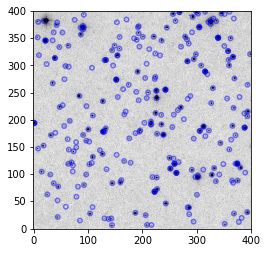

In [108]:
%matplotlib inline
# load the example star field and select its subregion
hdu = datasets.load_star_image()  
data = hdu.data[0:400, 0:400]    
# calculate mean, median , standard deviation of all pixel values in the image 
mean, median, std = sigma_clipped_stats(data, sigma=3.0, iters=5)    
# initialize DAOStarFinder Class instance 
daofind = DAOStarFinder(fwhm=3.0, threshold=5.*std)    
# find sources using DAOStarFinder,  passing it the 
# image data subtracted by the background 
sources = daofind(data - median)    

# sources have x,y positions, and CircularAperture tools helps to 
# make regions at these positions 
positions = (sources['xcentroid'], sources['ycentroid'])
apertures = CircularAperture(positions, r=4.)
# we normalize the image to make it more presentable ... 
norm = ImageNormalize(stretch=SqrtStretch())
plt.imshow(data, cmap='Greys', origin='lower', norm=norm)
# we overplot the detection apertures ... 
apertures.plot(color='blue', lw=1.5, alpha=0.5)

Using the NOAO data ... 

In [118]:
# Read in my compressed FITS file...
#http://docs.astropy.org/en/stable/io/fits/index.html
#http://www.astropy.org/astropy-tutorials/FITS-images.html
#http://www.astropy.org/astropy-tutorials/FITS-tables.html
DirIn = '/Users/chris/Downloads/'
fname = 'c4d_140331_091553_ooi_VR_v1.fits'
from astropy.io import fits
hdu = fits.open(DirIn+fname)

In [119]:
# NOAO Image data structure 
#http://iraf.noao.edu/projects/ccdmosaic/imagedef/imagedef.html#4.1
# https://fits.gsfc.nasa.gov/fits_primer.html 
# http://www.cv.nrao.edu/~aleroy/pytut/topic2/intro_fits_files.py
# http://datalab.noao.edu/notebooks/web/Data_Lab_Interface_Introduction.html 
# Display the informaiton ... 
hdu.info()

Filename: /Users/chris/Downloads/c4d_140331_091553_ooi_VR_v1.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU     218   ()      
  1  S29         ImageHDU       113   (2046, 4094)   float32   
  2  S31         ImageHDU       113   (2046, 4094)   float32   
  3  S25         ImageHDU       113   (2046, 4094)   float32   
  4  S26         ImageHDU       113   (2046, 4094)   float32   
  5  S27         ImageHDU       113   (2046, 4094)   float32   
  6  S28         ImageHDU       113   (2046, 4094)   float32   
  7  S20         ImageHDU       113   (2046, 4094)   float32   
  8  S21         ImageHDU       113   (2046, 4094)   float32   
  9  S22         ImageHDU       113   (2046, 4094)   float32   
 10  S23         ImageHDU       113   (2046, 4094)   float32   
 11  S24         ImageHDU       113   (2046, 4094)   float32   
 12  S14         ImageHDU       113   (2046, 4094)   float32   
 13  S15         ImageHDU       113   (2046, 4094)   float32 

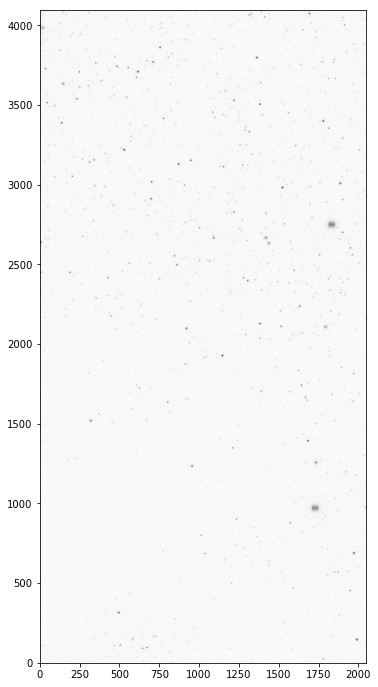

In [130]:
# See what they are ....
h =1
image_data = hdu[h].data
fig,ax = plt.subplots(1,1,figsize = (6,12))
ax.imshow(image_data, cmap='Greys', origin='lower', norm=norm)


This looks like the ds9 image  : (note the triangular star pattern...)
<img src="c4d_140331_091553_ds9.png"/>

But hdu2 (and every other layer) doesn't look like anything...   : 

/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/astropy/visualization/stretch.py:115: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(values, out=values)


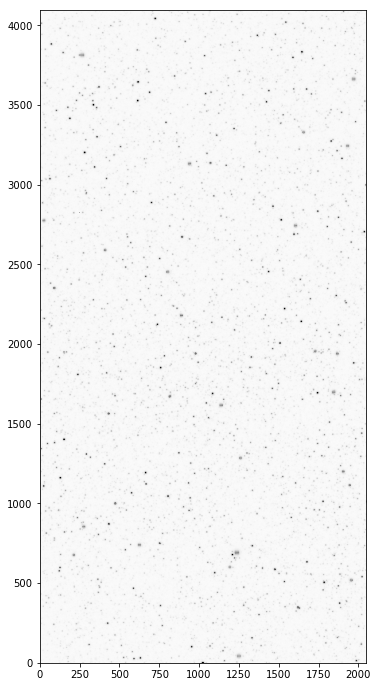

In [136]:
# See what they are ....
h =2
image_data = hdu[h].data
fig,ax = plt.subplots(1,1,figsize = (6,12))
ax.imshow(image_data, cmap='Greys', origin='lower', norm=norm)

What are these extra hdu's ? I don't know.  Try star counting on just hdu1 : 

Min: 300.297
Max: 44990.0
Mean: 477.337
Stdev: 518.735


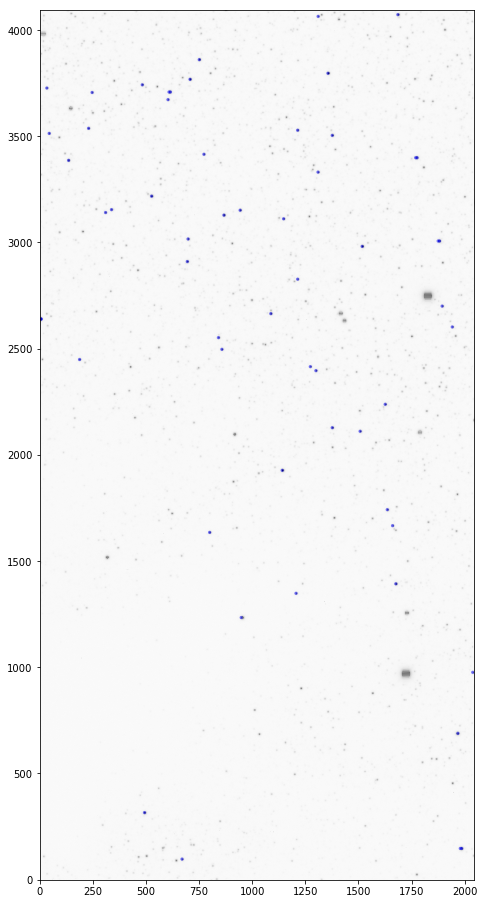

In [132]:
# http://www.astropy.org/astropy-tutorials/FITS-images.html 
# use the first layer, or whatever it is ..... 
# could it be like just one amplifier ? 
h =1
image_data = hdu[h].data

import numpy as np
print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Stdev:', np.std(image_data))

# I fear this works,  but it is just one frame...
mean, median, std = sigma_clipped_stats(image_data, sigma=3.0, iters=5)    
sources = daofind(image_data - median)    

positions = (sources['xcentroid'], sources['ycentroid'])
apertures = CircularAperture(positions, r=4.)
norm = ImageNormalize(stretch=SqrtStretch())
fig,ax = plt.subplots(1,1,figsize = (8,16))
ax.imshow(image_data, cmap='Greys', origin='lower', norm=norm)
apertures.plot(color='blue', lw=1.5, alpha=0.5)
plt.savefig('c4d_140331_091553_hdu'+str(h)+'.png', bbox_inches='tight')

Try stacking all these 'layers' : what we see .... 

In [ ]:
# Stack all frames ...
image_concat = [ hdu[i].data for i in range(1,60) ]
final_image = np.sum(image_concat, axis=0)
final_image.shape


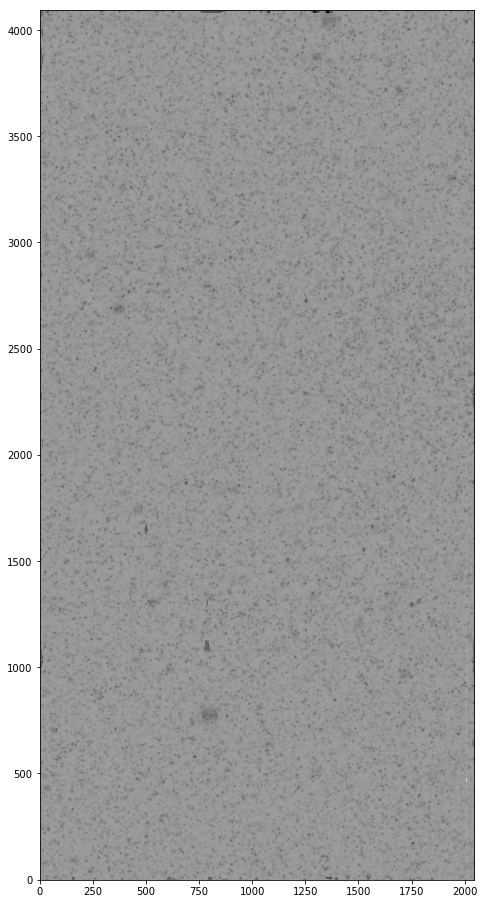

In [138]:
norm = ImageNormalize(stretch=SqrtStretch())
fig,ax = plt.subplots(1,1,figsize=(8,16))
ax.imshow(final_image, cmap='Greys', origin='lower', norm=norm)

Use the DAOFIND to find sources on that 'stacked' image .., 

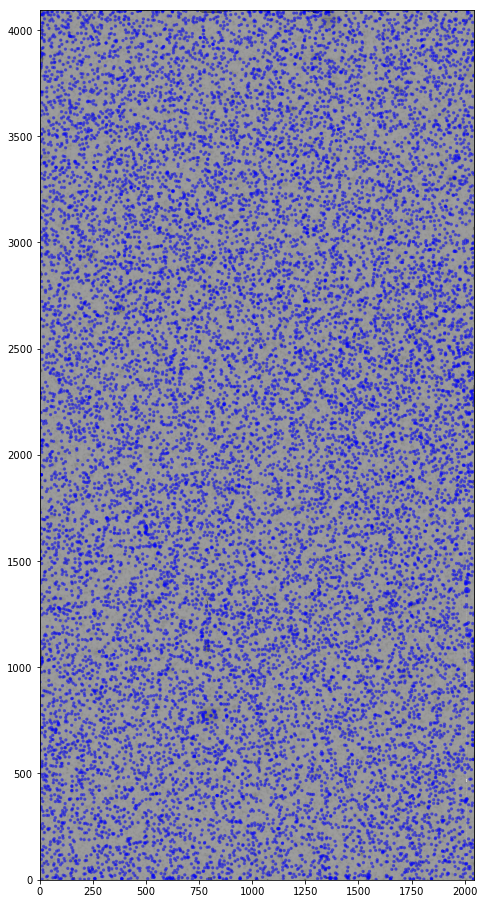

In [78]:
# DAOFIND http://photutils.readthedocs.io/en/stable/photutils/detection.html  
mean, median, std = sigma_clipped_stats(final_image, sigma=3.0, iters=5)    
sources = daofind(final_image - median)    

positions = (sources['xcentroid'], sources['ycentroid'])
apertures = CircularAperture(positions, r=4.)
norm = ImageNormalize(stretch=SqrtStretch())
fig,ax = plt.subplots(1,1,figsize = (8,16))
ax.imshow(final_image, cmap='Greys', origin='lower', norm=norm)
apertures.plot(color='blue', lw=1.5, alpha=0.5)

Seems wrong... 